### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot: >

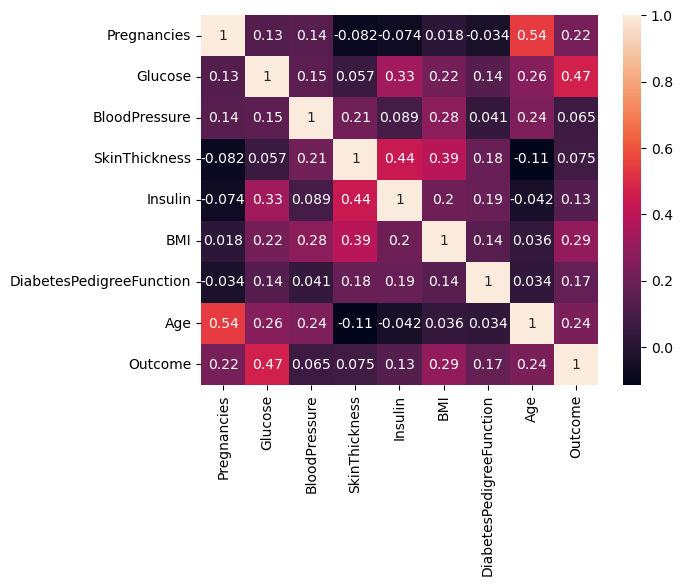

In [6]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Pregnancies', ylabel='BMI'>

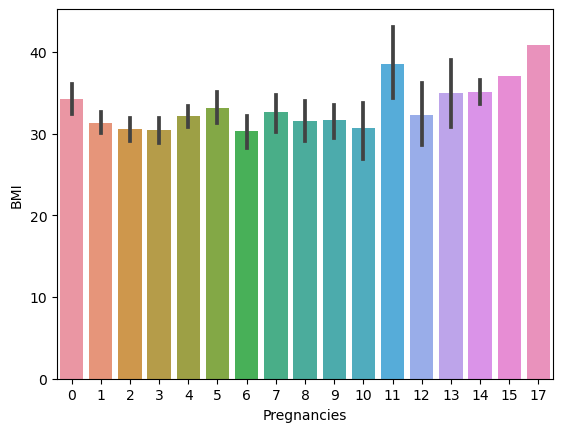

In [7]:
sns.barplot(data=df,x='Pregnancies',y='BMI')

<AxesSubplot: xlabel='Pregnancies', ylabel='DiabetesPedigreeFunction'>

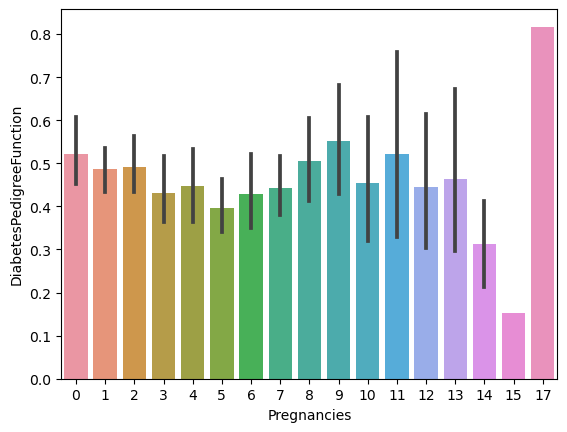

In [8]:
sns.barplot(data=df,x='Pregnancies',y='DiabetesPedigreeFunction')

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset

In [10]:
df.duplicated().sum()

0

There are no duplicated values in the dataset

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All the features are numerical, So we do not have to convert them.

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [12]:
## splitting the dependent and independent variables
X=df.iloc[:,:-1]
y=df.iloc[::,-1]

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
##splitting into train test 
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.33)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [17]:
# Hyperparameter Tuning
parameter={
    "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter":['best', 'random'],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features" :  ['auto', 'sqrt', 'log2']
}

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regressor = DecisionTreeRegressor()

In [20]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(regressor, param_grid=parameter, cv=5, scoring='accuracy')

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
cv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [24]:
regressor = DecisionTreeRegressor(criterion= 'absolute_error',
                                   max_depth= 1,
                                   max_features= 'auto',
                                   splitter='best')

In [25]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      max_features='auto')

In [26]:
y_pred=regressor.predict(X_test)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
score=accuracy_score(y_test, y_pred)

In [29]:
print(score)

0.7204724409448819


In [30]:
from sklearn.metrics import recall_score

In [31]:
recall=recall_score(y_test, y_pred)

In [32]:
print(recall)

0.4418604651162791


In [33]:
from sklearn.metrics import f1_score
f1Score=f1_score(y_test, y_pred)

In [34]:
print(f1Score)

0.5170068027210885


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

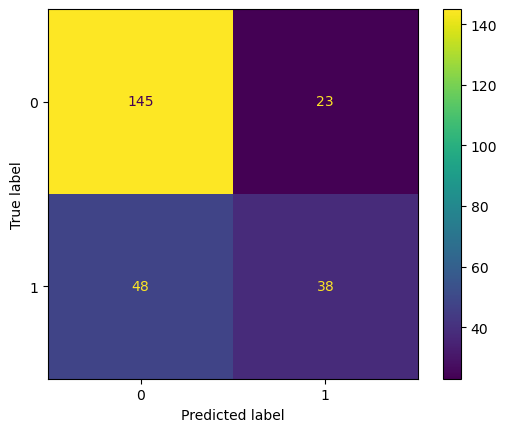

In [36]:
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
(tn, fp, fn, tp)

(145, 23, 48, 38)

In [38]:
from sklearn.metrics import RocCurveDisplay

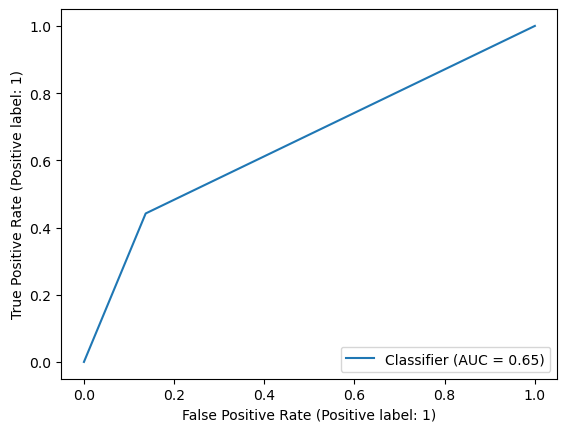

In [39]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

[Text(0.5, 0.75, 'x[1] <= 143.5\nabsolute_error = 0.354\nsamples = 514\nvalue = 0.0'),
 Text(0.25, 0.25, 'absolute_error = 0.236\nsamples = 399\nvalue = 0.0'),
 Text(0.75, 0.25, 'absolute_error = 0.235\nsamples = 115\nvalue = 1.0')]

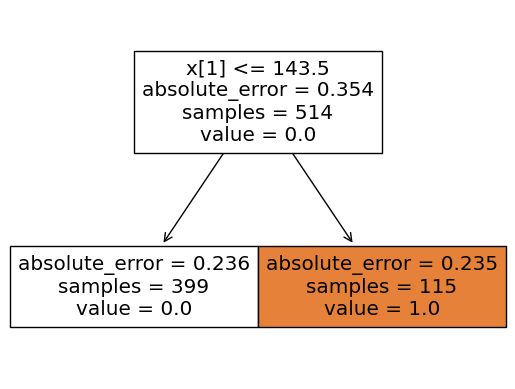

In [40]:
from sklearn import tree
tree.plot_tree(regressor,filled=True)

As understood from the above tree that at start there are 514 samples available and the absolute_error is 0.354.
It starts if the value is smaller than or equal to 143.5 and then there are 2 branches created, the first one have the 399 samples and absolute error of 0.236.While, the other has 115 samples and absolute_error of 0.235 .
Note: I have Already used GridSearchCV for best parameters and used those parameters during the creation of Regressor. Maximum depth was set to 1 and hence no further can be noticed.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

* Predicting the data by entering input features : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, 	DiabetesPedigreeFunction, Age
* Outcome : 0 if non-diabetic, 1 if diabetic

In [44]:
regressor.predict([[6,98,58,33,190,34.0,0.430,43]])

array([0.])

In [54]:
regressor.predict([[7,148,72,45,250,35.9,0.410,25]])

array([1.])

### The End